For samples from N(0, 1)

Box-Muller Method
Sample Size = 100
Sample Mean = 0.000802385473781202
Sample Variance = 1.1152310450023608
Theoretical Mean = 0
Theoretical Variance = 1


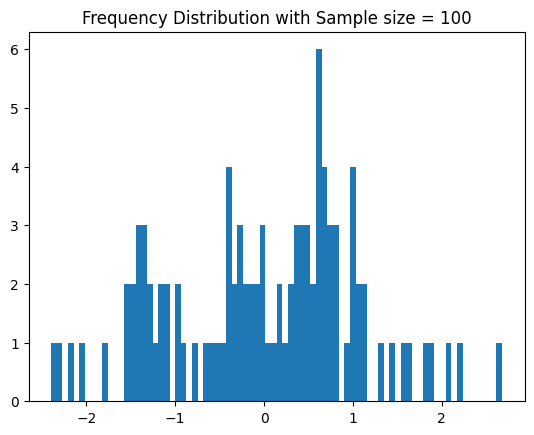

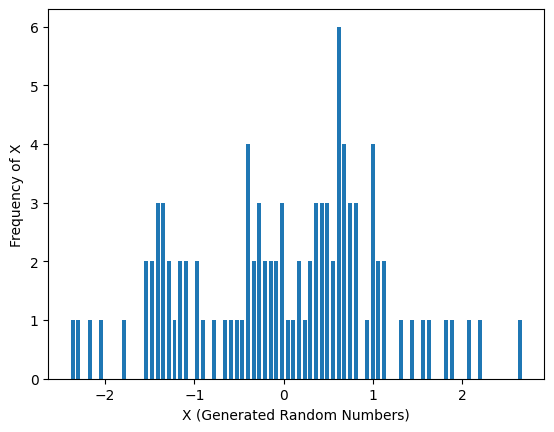


Box-Muller Method
Sample Size = 10000
Sample Mean = -0.002445915575936934
Sample Variance = 1.003263935942971
Theoretical Mean = 0
Theoretical Variance = 1


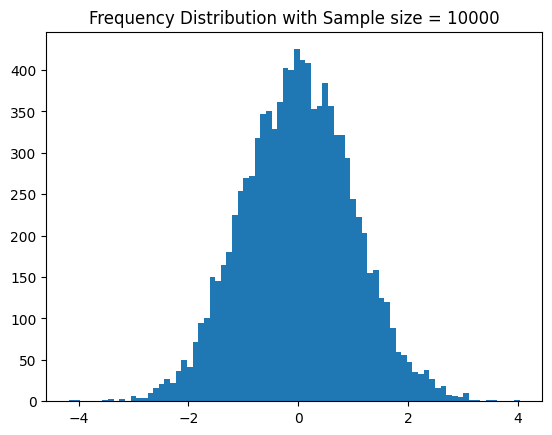

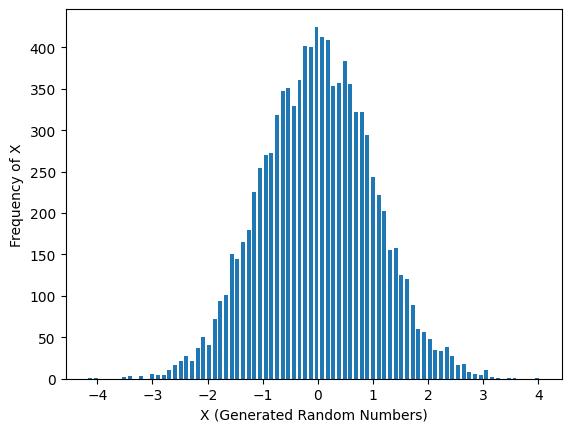


Marsaglia and Bray Method
Sample Size = 100
Sample Mean = 0.05014965758267821
Sample Variance = 1.233049045708104
Theoretical Mean = 0
Theoretical Variance = 1


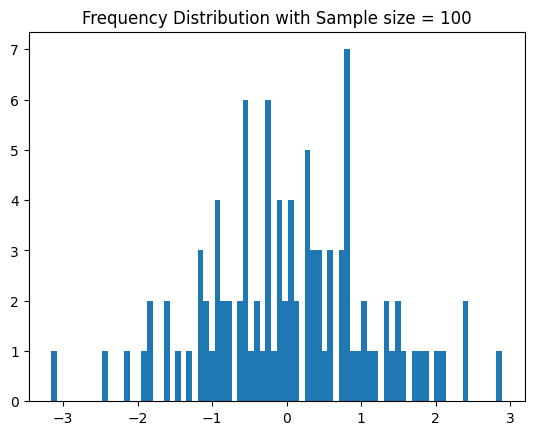

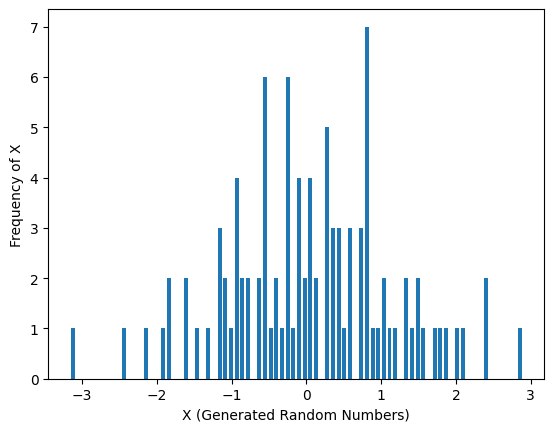


Marsaglia and Bray Method
Sample Size = 10000
Sample Mean = -0.0014916944631451145
Sample Variance = 1.0129933498733614
Theoretical Mean = 0
Theoretical Variance = 1


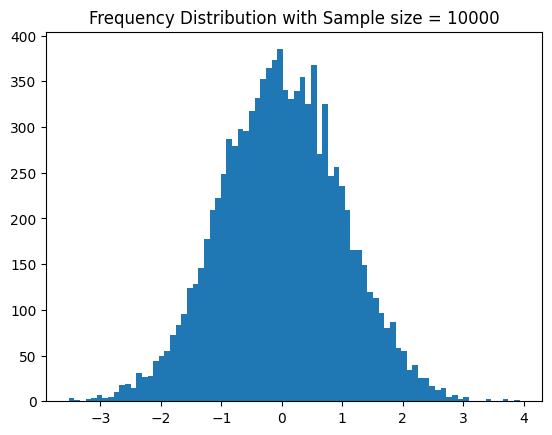

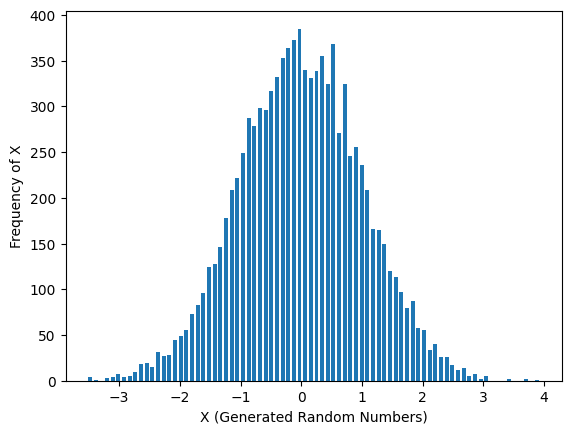

For samples from N(0, 5)

Box-Muller Method
Sample Size = 100
Sample Mean = 0.0017941884635330795
Sample Variance = 5.576155225011804
Theoretical Mean = 0
Theoretical Variance = 5


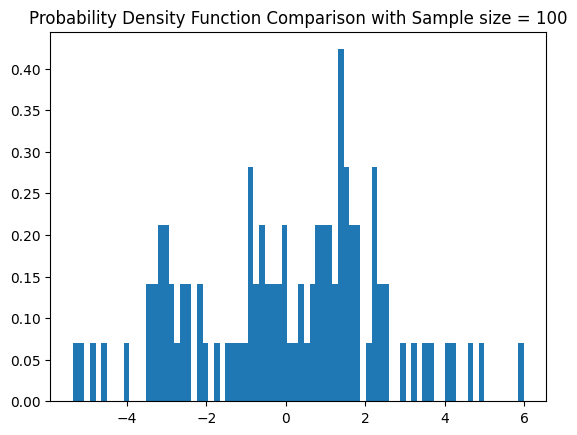

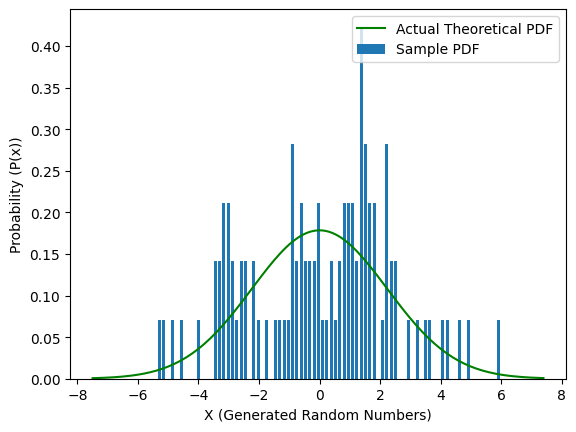

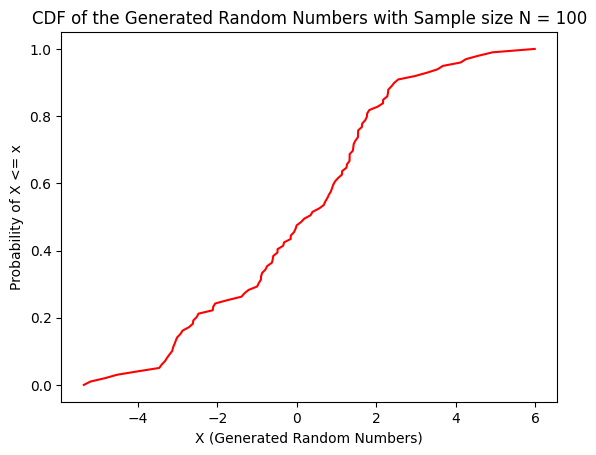


Box-Muller Method
Sample Size = 10000
Sample Mean = -0.005469233495020541
Sample Variance = 5.016319679714854
Theoretical Mean = 0
Theoretical Variance = 5


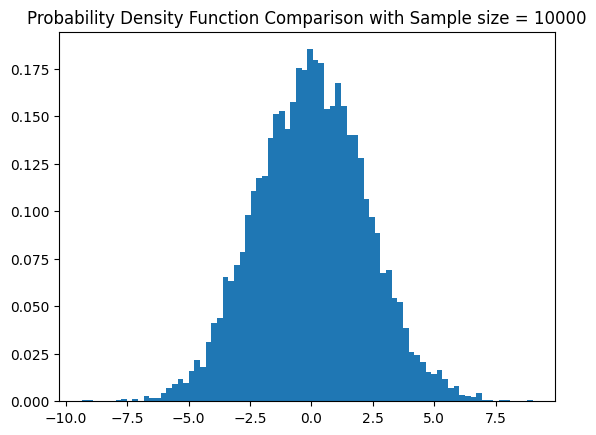

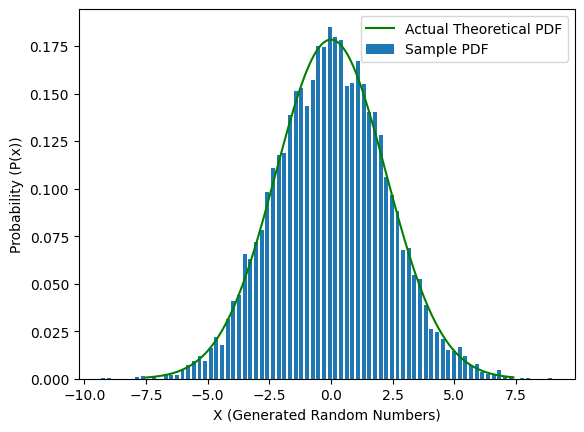

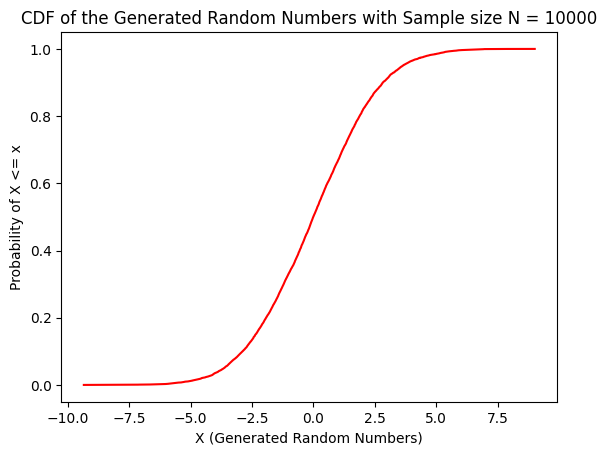


Marsaglia and Bray Method
Sample Size = 100
Sample Mean = 0.11213804340320617
Sample Variance = 6.165245228540522
Theoretical Mean = 0
Theoretical Variance = 5


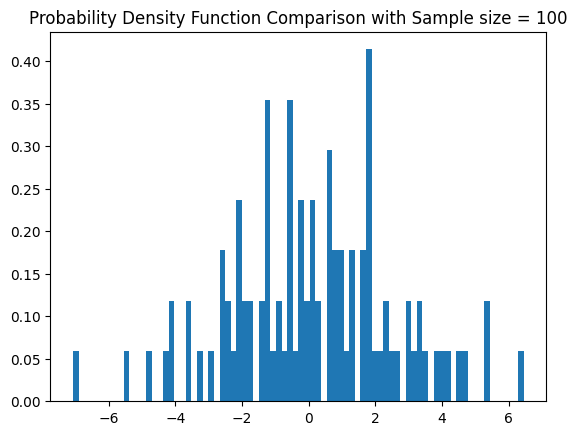

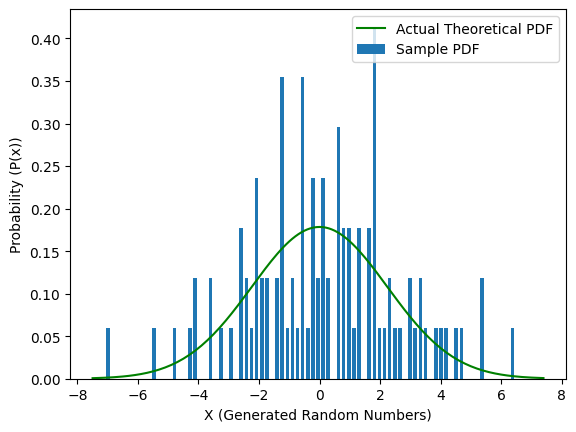

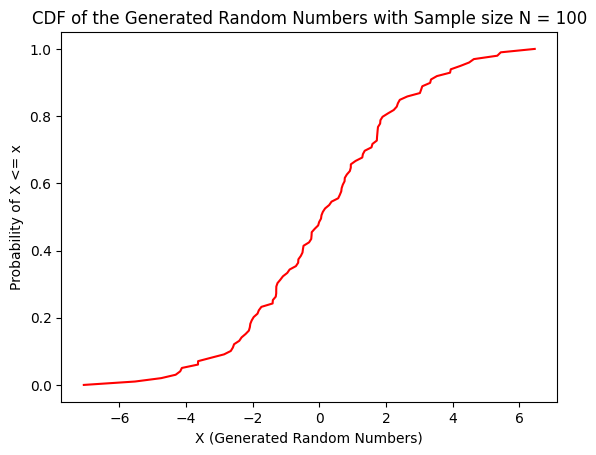


Marsaglia and Bray Method
Sample Size = 10000
Sample Mean = -0.003335530221252533
Sample Variance = 5.064966749366807
Theoretical Mean = 0
Theoretical Variance = 5


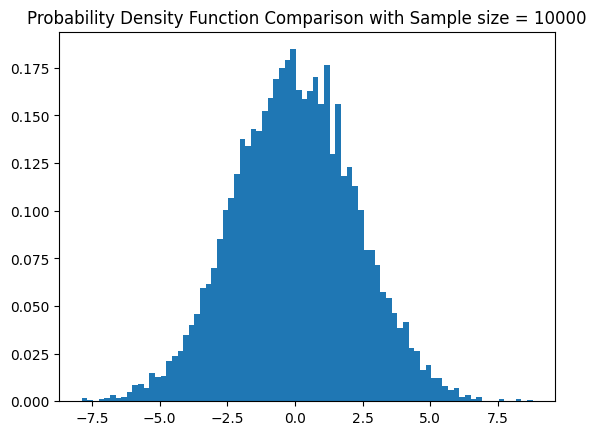

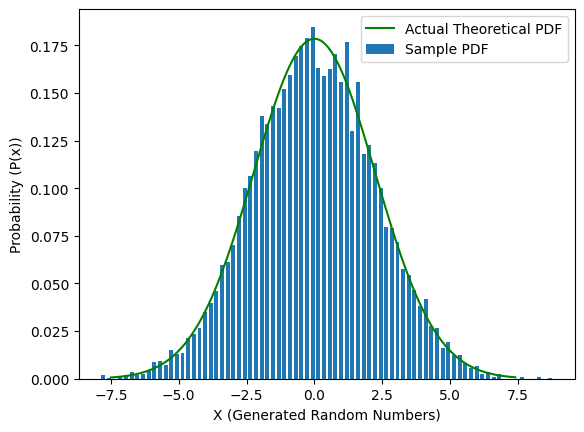

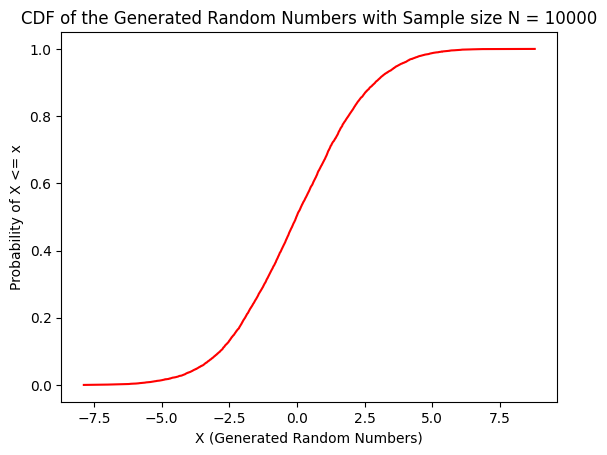

For samples from N(5, 5)

Box-Muller Method
Sample Size = 100
Sample Mean = 5.001794188463534
Sample Variance = 5.576155225011804
Theoretical Mean = 5
Theoretical Variance = 5


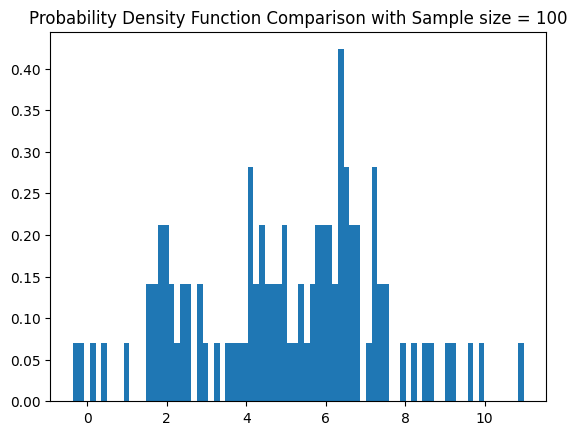

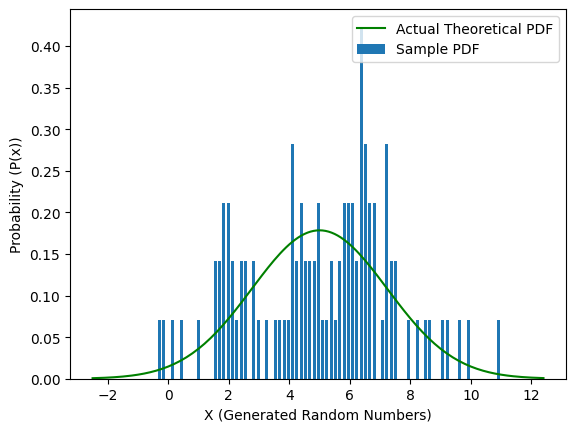

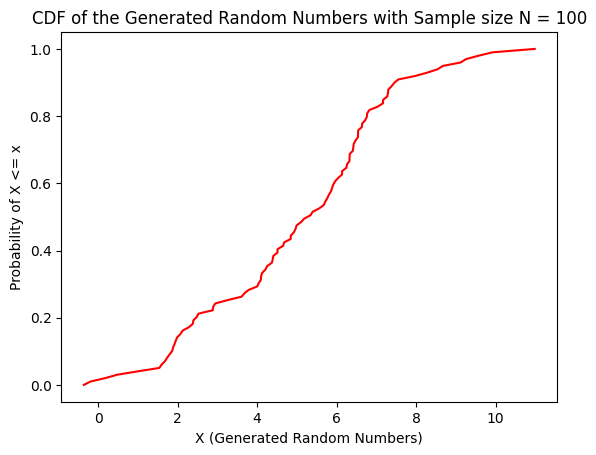


Box-Muller Method
Sample Size = 10000
Sample Mean = 4.99453076650498
Sample Variance = 5.016319679714854
Theoretical Mean = 5
Theoretical Variance = 5


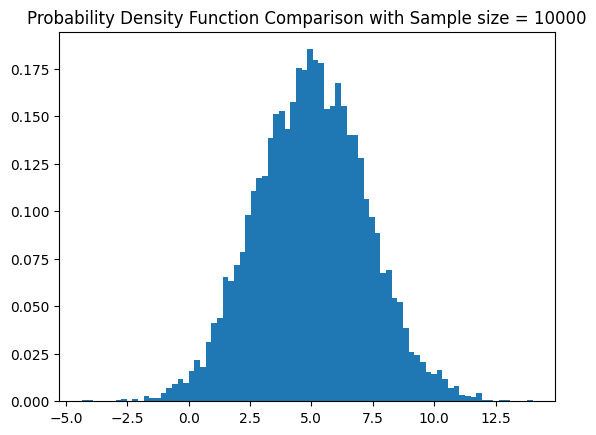

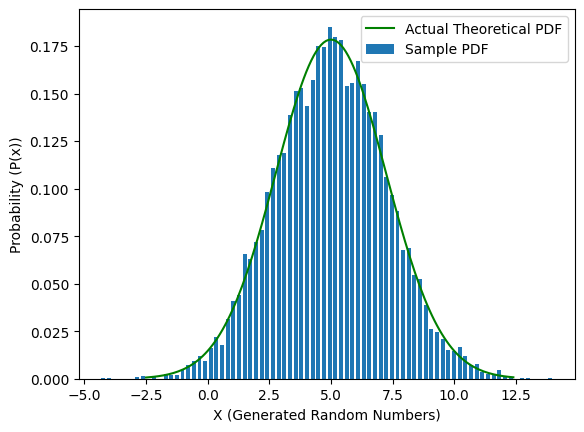

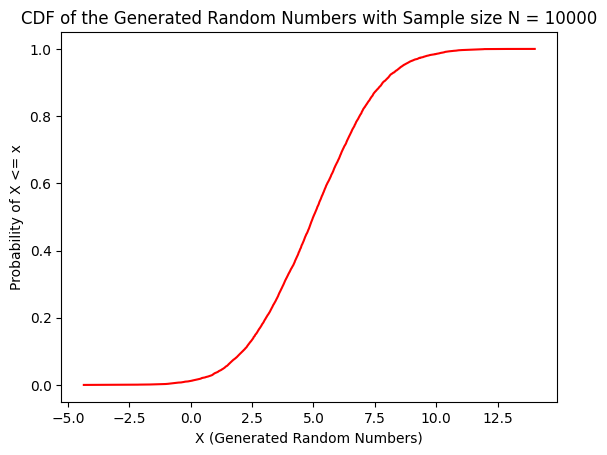


Marsaglia and Bray Method
Sample Size = 100
Sample Mean = 5.112138043403206
Sample Variance = 6.165245228540522
Theoretical Mean = 5
Theoretical Variance = 5


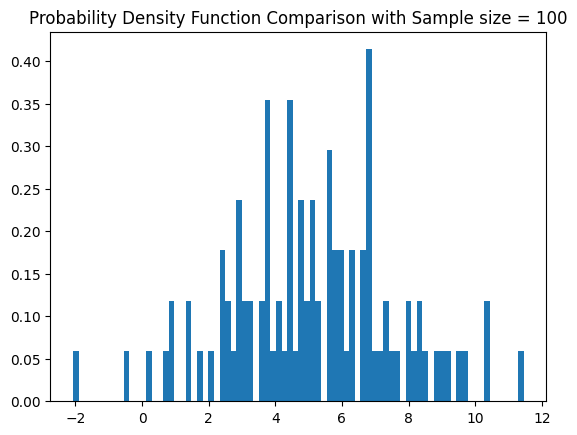

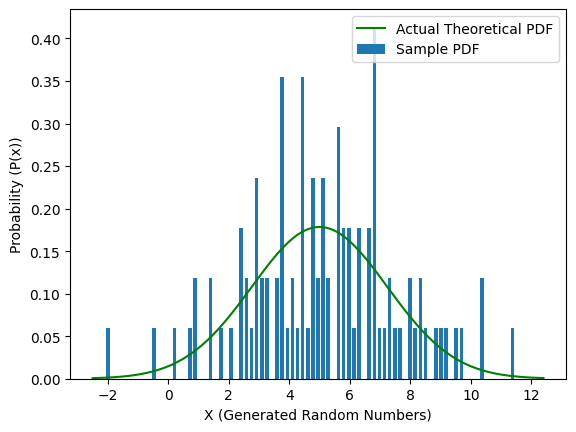

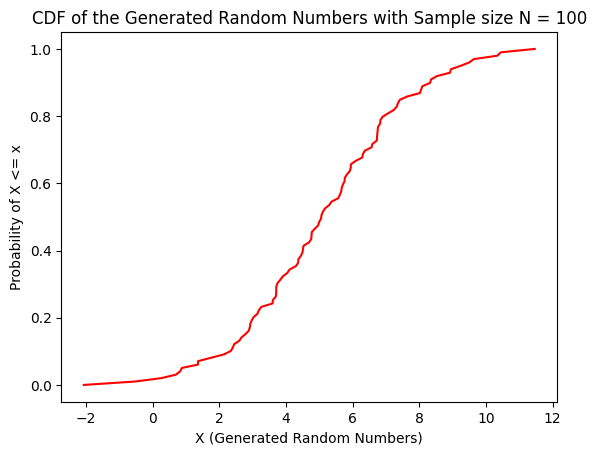


Marsaglia and Bray Method
Sample Size = 10000
Sample Mean = 4.9966644697787475
Sample Variance = 5.064966749366808
Theoretical Mean = 5
Theoretical Variance = 5


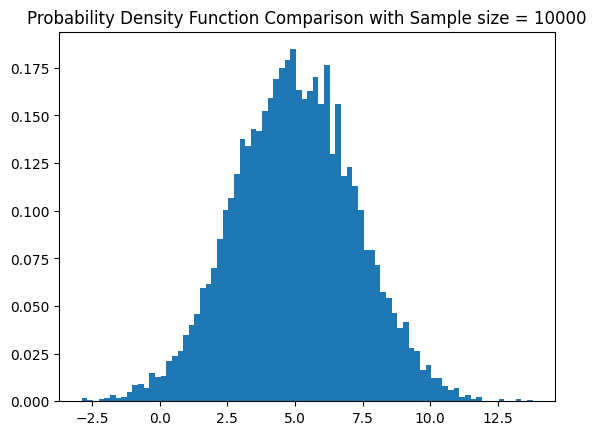

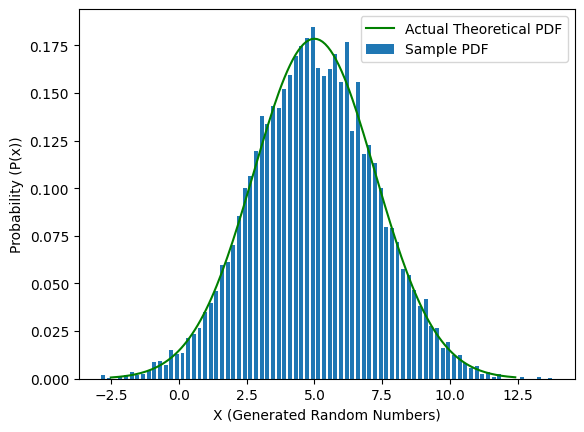

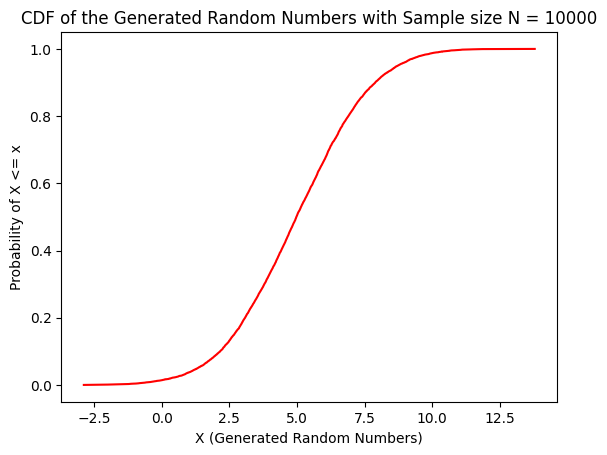

In [1]:
# MA323 Monte Carlo Simulation
# Lab 4

# Rasesh Srivastava
# Roll Number - 210123072

# Question 1
import numpy as npy
import matplotlib.pyplot as GraphPlotter
import math 
from scipy import stats
import time
def GraphOfCDFMaker(numbers, size):
  sorted_Y = npy.sort(numbers)
  l = len(sorted_Y)
  y_val = npy.arange(l)/float(l - 1)
  GraphPlotter.title(f'CDF of the Generated Random Numbers with Sample size N = {size}')
  GraphPlotter.xlabel('X (Generated Random Numbers)')
  GraphPlotter.ylabel('Probability of X <= x')
  GraphPlotter.plot(sorted_Y, y_val, color = 'red')
  GraphPlotter.show()

def plot(numbers, size, Marker, mean = 0, var = 1):
  isNormali = False
  if(Marker):
    isNormali = True
    GraphPlotter.title(f'Probability Density Function Comparison with Sample size = {size}')
  else:
    GraphPlotter.title(f'Frequency Distribution with Sample size = {size}')
  hist, bins = npy.histogram(numbers, bins = 80, density = isNormali)
  GraphPlotter.hist(numbers, bins = 80, density = isNormali)
  GraphPlotter.show()
  w = 0.7 * (bins[1] - bins[0])
  center = (bins[:-1] + bins[1:]) / 2
  GraphPlotter.bar(center, hist, align = 'center', width = w, label = 'Sample PDF')
  if(Marker != 0):
    GraphPlotter.ylabel('Probability (P(x))')
  else:
    GraphPlotter.ylabel('Frequency of X')
  GraphPlotter.xlabel('X (Generated Random Numbers)')
  if(isNormali):
    x = npy.arange(mean - 7.5, mean + 7.5, 0.1)
    y = stats.norm.pdf(x, mean, math.sqrt(var))
    GraphPlotter.plot(x, y, color = 'green', label = 'Actual Theoretical PDF')
    GraphPlotter.legend(loc = "upper right")
  GraphPlotter.show()  

def MarsagliaAndBrayMethod():
  RandomNumbersGenerated = []
  N_Value = [50, 5000]
  for i in N_Value:
    X = []
    GeneratedSequence1 = []
    GeneratedSequence2 = []
    counter = 0
    T1 = time.time()
    while len(X) != i:
      Sequence1 = npy.random.random()
      Sequence2 = npy.random.random()
      counter = counter + 1
      Sequence1 = 2*Sequence1 - 1
      Sequence2 = 2*Sequence2 - 1
      x = Sequence1*Sequence1 + Sequence2*Sequence2
      if(x > 1):
        continue
      X.append(x)
      GeneratedSequence1.append(Sequence1)
      GeneratedSequence2.append(Sequence2)
    TempArray = [math.sqrt(-2*math.log(x)/x) for x in X]
    GenSeq = []
    for Counter in range(0, i):
      GenSeq.append(GeneratedSequence1[Counter]*TempArray[Counter])
      GenSeq.append(GeneratedSequence2[Counter]*TempArray[Counter])
    T2 = time.time()
    RandomNumbersGenerated.append(GenSeq)
    print("\nMarsaglia and Bray Method")
    LengthOfZ = len(GenSeq)
    print(f"Sample Size = {LengthOfZ}")
    print(f"Sample Mean = {npy.mean(GenSeq)}")
    print(f"Sample Variance = {npy.var(GenSeq)}")
    print("Theoretical Mean = 0")
    print("Theoretical Variance = 1")
    plot(GenSeq, LengthOfZ, 0)
  return RandomNumbersGenerated

def BoxMullerMethod():
  RandomNumbersGenerated = []
  N_Value = [50, 5000]
  for i in N_Value:
    T1 = time.time()
    GenSeq = []
    GeneratedSequence1 = npy.random.uniform(size = i)
    GeneratedSequence2 = npy.random.uniform(size = i)
    R = [-2*math.log(ui) for ui in GeneratedSequence1]
    V = [2*math.pi*ui for ui in GeneratedSequence2]
    for Counter in range(0, i):
      GenSeq.append(math.sqrt(R[Counter]) * math.cos(V[Counter]))
      GenSeq.append(math.sqrt(R[Counter]) * math.sin(V[Counter]))
    T2 = time.time()
    RandomNumbersGenerated.append(GenSeq)
    print("\nBox-Muller Method")
    LengthOfZ = len(GenSeq)
    print(f"Sample Size = {LengthOfZ}")
    print(f"Sample Mean = {npy.mean(GenSeq)}")
    print(f"Sample Variance = {npy.var(GenSeq)}")
    print("Theoretical Mean = 0")
    print("Theoretical Variance = 1") 
    plot(GenSeq, LengthOfZ, 0) 
  return RandomNumbersGenerated

def NormalDistributionGen(GeneratedData1, GeneratedData2, mean, var):
  StandardDeviation = math.sqrt(var)
  for i in range(0, 2):
    ModifiedDistribution = []
    for Counter in range(0, len(GeneratedData1[i])):
      ModifiedDistribution.append(mean + StandardDeviation*GeneratedData1[i][Counter])
    print("\nBox-Muller Method")
    ReqLength = len(ModifiedDistribution)
    print(f"Sample Size = {ReqLength}")
    print(f"Sample Mean = {npy.mean(ModifiedDistribution)}")
    print(f"Sample Variance = {npy.var(ModifiedDistribution)}")
    print(f"Theoretical Mean = {mean}")
    print(f"Theoretical Variance = {var}")
    plot(ModifiedDistribution, ReqLength, 1, mean, var)
    GraphOfCDFMaker(ModifiedDistribution, ReqLength)

  for i in range(0, 2):
    ModifiedDistribution = []
    for Counter in range(0, len(GeneratedData2[i])):
       ModifiedDistribution.append(mean + StandardDeviation*GeneratedData2[i][Counter])
    print("\nMarsaglia and Bray Method")
    ReqLength = len(ModifiedDistribution)
    print(f"Sample Size = {ReqLength}")
    print(f"Sample Mean = {npy.mean(ModifiedDistribution)}")
    print(f"Sample Variance = {npy.var(ModifiedDistribution)}")
    print(f"Theoretical Mean = {mean}")
    print(f"Theoretical Variance = {var}")
    plot(ModifiedDistribution, ReqLength, 1, mean, var)
    GraphOfCDFMaker(ModifiedDistribution, ReqLength)

print("For samples from N(0, 1)")
GeneratedData1 = BoxMullerMethod()
GeneratedData2 = MarsagliaAndBrayMethod()

print("For samples from N(0, 5)")
NormalDistributionGen(GeneratedData1, GeneratedData2, 0, 5)

print("For samples from N(5, 5)")
NormalDistributionGen(GeneratedData1, GeneratedData2, 5, 5)


In [15]:
# Question 2
import numpy as npy
import math 
import time
def MarsagliaAndBrayMethod():
  RandomNumbersGenerated = []
  N_Value = [50, 5000]
  for i in N_Value:
    NumberOfIterations = 50
    TotalTimeRequired = 0
    for NumberOfValues in range(0, NumberOfIterations):
      X = []
      GeneratedSequence1 = []
      GeneratedSequence2 = []
      counter = 0
      T1 = time.time()
      while len(X) != i:
        Sequence1 = npy.random.random()
        Sequence2 = npy.random.random()
        counter = counter + 1
        Sequence1 = 2*Sequence1 - 1
        Sequence2 = 2*Sequence2 - 1
        x = Sequence1*Sequence1 + Sequence2*Sequence2
        if(x > 1):
          continue
        X.append(x)
        GeneratedSequence1.append(Sequence1)
        GeneratedSequence2.append(Sequence2)
      TempArray = [math.sqrt(-2*math.log(x)/x) for x in X]
      GenSeq = []
      for Counter in range(0, i):
        GenSeq.append(GeneratedSequence1[Counter]*TempArray[Counter])
        GenSeq.append(GeneratedSequence2[Counter]*TempArray[Counter])
      T2 = time.time()
      RandomNumbersGenerated.append(GenSeq)
      NumberOfValues = NumberOfValues + 1
      TotalTimeRequired += T2 - T1
    print("\nMarsaglia and Bray Method")
    print(f"Sample Size = {len(GenSeq)}")
    print(f"Computation Time = {(TotalTimeRequired/NumberOfIterations)} seconds")
  return RandomNumbersGenerated

def BoxMullerMethod():
  N_Value = [50, 5000]
  RandomNumbersGenerated = []
  for i in N_Value:
    NumberOfIterations = 50
    TotalTimeRequired = 0
    for NumberOfValues in range(0, NumberOfIterations):
      T1 = time.time()
      GeneratedSequence1 = npy.random.uniform(size = i)
      GeneratedSequence2 = npy.random.uniform(size = i)
      R = [-2*math.log(ui) for ui in GeneratedSequence1]
      V = [2*math.pi*ui for ui in GeneratedSequence2]
      GenSeq = []
      for Counter in range(0, i):
        GenSeq.append(math.sqrt(R[Counter]) * math.cos(V[Counter]))
        GenSeq.append(math.sqrt(R[Counter]) * math.sin(V[Counter]))
      T2 = time.time()
      RandomNumbersGenerated.append(GenSeq)
      NumberOfValues = NumberOfValues + 1
      TotalTimeRequired += T2 - T1
    print("\nBox-Muller Method")
    print(f"Sample Size = {len(GenSeq)}")
    print(f"Computation Time = {(TotalTimeRequired/NumberOfIterations)} seconds")
  return RandomNumbersGenerated

print("For samples from N(0, 1)")
GeneratedData1 = BoxMullerMethod()
GeneratedData2 = MarsagliaAndBrayMethod()


For samples from N(0, 1)

Box-Muller Method
Sample Size = 100
Computation Time = 0.00013020992279052734 seconds

Box-Muller Method
Sample Size = 10000
Computation Time = 0.007882399559020996 seconds

Marsaglia and Bray Method
Sample Size = 100
Computation Time = 0.00012011051177978515 seconds

Marsaglia and Bray Method
Sample Size = 10000
Computation Time = 0.016033759117126466 seconds


In [29]:
# Question 3
import numpy as npy
import math 
def MarsagliaAndBrayMethod():
  RandomNumbersGenerated = []
  N_Value = [50, 5000]
  for i in N_Value:
    NumberOfIterations = 10
    for NumberOfValues in range(0, NumberOfIterations):
      X = []
      GeneratedSequence1 = []
      GeneratedSequence2 = []
      counter = 0
      while len(X) != i:
        Sequence1 = npy.random.random()
        Sequence2 = npy.random.random()
        counter += 1
        Sequence1 = 2*Sequence1 - 1
        Sequence2 = 2*Sequence2 - 1
        x = Sequence1*Sequence1 + Sequence2*Sequence2
        if(x > 1):
          continue
        X.append(x)
        GeneratedSequence1.append(Sequence1)
        GeneratedSequence2.append(Sequence2)
      TempArray = [math.sqrt(-2*math.log(x)/x) for x in X]
      GenSeq = []
      for Counter in range(0, i):
        GenSeq.append(GeneratedSequence1[Counter]*TempArray[Counter])
        GenSeq.append(GeneratedSequence2[Counter]*TempArray[Counter])
      RandomNumbersGenerated.append(GenSeq)
      print(f"\nIteration Number: {(NumberOfValues + 1)}")
      LengthOfGenSeq = len(GenSeq)
      print(f"Sample Size = {LengthOfGenSeq}")
      print(f"Proportion of values rejected = {(1 - LengthOfGenSeq/(2*counter))}")
      print(f"Theoretical value of the Proportion of values rejected = {(1 - math.pi/4)}")
    NumberOfValues = NumberOfValues + 1

print("For samples from N(0, 1)")
MarsagliaAndBrayMethod()

For samples from N(0, 1)

Iteration Number: 1
Sample Size = 100
Proportion of values rejected = 0.180327868852459
Theoretical value of the Proportion of values rejected = 0.21460183660255172

Iteration Number: 2
Sample Size = 100
Proportion of values rejected = 0.16666666666666663
Theoretical value of the Proportion of values rejected = 0.21460183660255172

Iteration Number: 3
Sample Size = 100
Proportion of values rejected = 0.23076923076923073
Theoretical value of the Proportion of values rejected = 0.21460183660255172

Iteration Number: 4
Sample Size = 100
Proportion of values rejected = 0.21875
Theoretical value of the Proportion of values rejected = 0.21460183660255172

Iteration Number: 5
Sample Size = 100
Proportion of values rejected = 0.2857142857142857
Theoretical value of the Proportion of values rejected = 0.21460183660255172

Iteration Number: 6
Sample Size = 100
Proportion of values rejected = 0.24242424242424243
Theoretical value of the Proportion of values rejected = 0.